In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "finger_z_position"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
import pandas as pd
import os

FINGER_PATH = os.path.join("datasets", "finger_z")

def load_finger_data(finger_path =FINGER_PATH, index = 1):
    csv_path = os.path.join(finger_path, "%d.csv"%index)
    return pd.read_csv(csv_path)


def merge_data(num = 10):
    data = load_finger_data()
    for i in range(1,num): 
        data = data.append(load_finger_data(index = i+1), ignore_index=True)
    return data

data = load_finger_data()
data.describe()

,n_index,p_index,a1,a2,a3,a4,a5,Fy,Fx,Fz,Ty,Tx,Tz
count,110.000000,110.00000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,5.500000,5.00000,128.018182,390.027273,456.627273,528.236364,105.072727,-0.086367,2.439791,0.384380,-0.217024,-0.001114,-0.001096
std,2.885427,3.17675,4.130846,195.583927,256.231577,198.940216,1.405814,0.044396,0.150648,0.389536,0.021499,0.004166,0.000971
min,1.000000,0.00000,118.000000,102.000000,114.000000,217.000000,102.000000,-0.180840,2.192200,-0.437120,-0.282791,-0.008608,-0.003305
25%,3.000000,2.00000,126.000000,146.000000,178.250000,269.000000,104.000000,-0.121840,2.365450,0.110880,-0.227796,-0.005443,-0.001833
50%,5.500000,5.00000,128.000000,494.000000,446.500000,637.000000,105.000000,-0.080340,2.434700,0.365380,-0.216211,-0.000108,-0.001127
75%,8.000000,8.00000,130.750000,549.000000,727.000000,705.000000,106.000000,-0.052340,2.473700,0.663130,-0.201711,0.002412,-0.000422
max,10.000000,10.00000,136.000000,639.000000,779.000000,728.000000,108.000000,0.015160,3.000200,1.286880,-0.180451,0.005972,0.001050


Saving figure attribute_histogram_plots


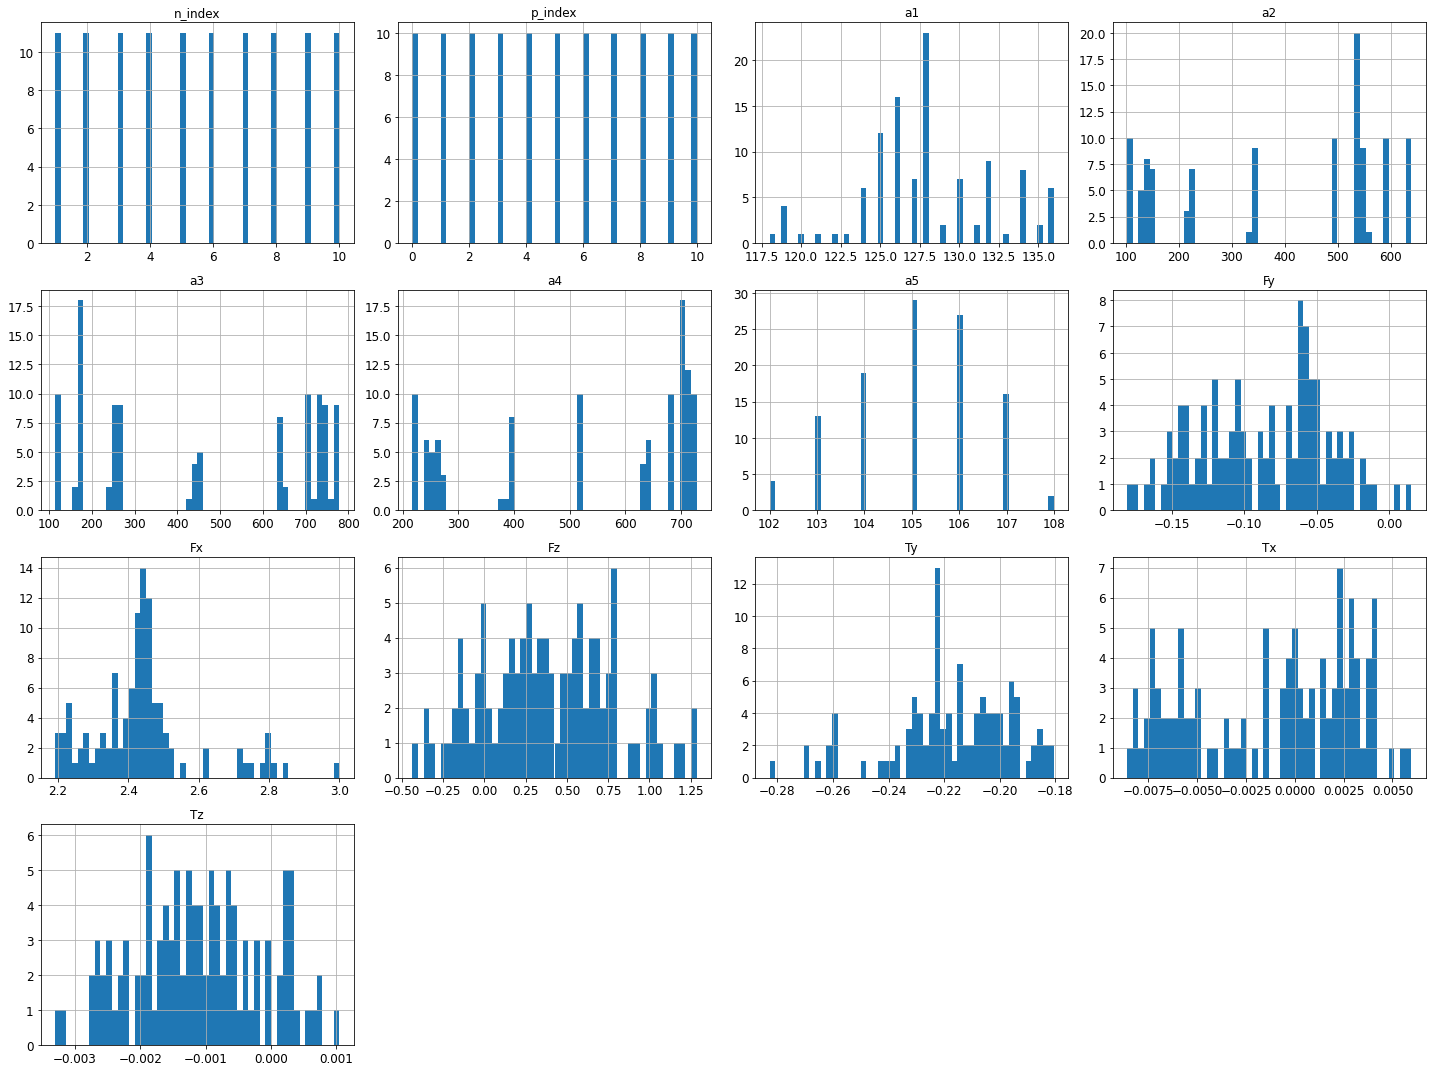

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["p_index"]):
    data_train = data.loc[train_index]
    data_test = data.loc[test_index]

In [5]:
finger = data_train.copy()

In [6]:
finger = data_train.drop(['p_index','n_index','Fx','Fy','Fz','Tx','Ty','Tz'], axis=1) # drop labels for training set
finger_label = data_train["p_index"].copy()
finger_label

68    2
53    9
39    6
42    9
6     6
     ..
85    8
30    8
38    5
78    1
91    3
Name: p_index, Length: 88, dtype: int64

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

full_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

finger_pre = full_pipeline.fit_transform(finger)
finger_pre

array([[-0.43430644,  0.82218973,  1.06525254,  0.89795751, -0.01675298],
       [ 1.4300334 , -1.30900261, -1.11890283, -1.42067061,  1.45750932],
       [-0.43430644, -0.24597414, -0.75030211, -0.04161729, -0.75388413],
       [ 1.4300334 , -1.30900261, -1.12282412, -1.42067061,  1.45750932],
       [-1.59951883, -0.26651576, -0.7777511 , -0.06687467, -1.49101528],
       [ 0.03177852,  1.02247046,  1.14759951,  0.93331785, -0.75388413],
       [-0.9003914 ,  0.75542949,  0.99074813,  0.88785455, -0.01675298],
       [ 0.96394844, -1.24737777, -1.08361128, -1.30448663, -0.01675298],
       [-0.66734892,  0.82732513,  1.06525254,  0.90806046, -0.01675298],
       [-0.43430644, -0.25624495, -0.75422339, -0.04666876, -0.01675298],
       [ 0.73090596, -0.84681632, -0.78559367, -0.66800048, -0.01675298],
       [-0.66734892,  0.75542949,  0.73978594,  0.76156762, -1.49101528],
       [ 0.96394844, -1.25251318, -1.08753256, -1.30953811, -0.01675298],
       [ 0.96394844, -1.25251318, -1.0

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(finger_pre, finger_label)

LinearRegression()

In [9]:
from sklearn.metrics import mean_squared_error

finger_predictions = lin_reg.predict(finger_pre)
lin_mse = mean_squared_error(finger_label, finger_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.7043718525525491

In [10]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(finger_pre, finger_label)

DecisionTreeRegressor(random_state=42)

In [11]:
finger_predictions = tree_reg.predict(finger_pre)
tree_mse = mean_squared_error(finger_label, finger_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [12]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, finger_pre, finger_label,
                         scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)

In [13]:

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.23570226 0.23570226 0.23570226 0.54232614 0.        ]
Mean: 0.24988658514663759
Standard deviation: 0.17237620865087583


In [14]:
lin_scores = cross_val_score(lin_reg, finger_pre, finger_label,
                             scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [0.77125439 0.64001064 0.74932485 0.83112148 0.81253271]
Mean: 0.7608488134494997
Standard deviation: 0.0670110642071594


In [15]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(finger_pre, finger_label)

RandomForestRegressor(random_state=42)

In [16]:
finger_predictions = forest_reg.predict(finger_pre)
forest_mse = mean_squared_error(finger_label, finger_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.03974349575144906

In [17]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, finger_pre, finger_label,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.09766724 0.15984367 0.09192388 0.21363796 0.02262222]
Mean: 0.1171389928590983
Standard deviation: 0.0649370646474571


In [18]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(finger_pre, finger_label)
finger_predictions = svm_reg.predict(finger_pre)
svm_mse = mean_squared_error(finger_label, finger_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

0.7554832279763244

In [19]:
svm_scores = cross_val_score(svm_reg, finger_pre, finger_label,
                                scoring="neg_mean_squared_error", cv=5)
svm_rmse_scores = np.sqrt(-svm_scores)
display_scores(svm_rmse_scores)

Scores: [0.76188338 0.66177028 0.80124809 0.87692158 0.91535109]
Mean: 0.8034348812424039
Standard deviation: 0.08913551632562056


In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'bootstrap': [True],'n_estimators': [3, 10, 30,100], 'max_features': [2, 3,4,5]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10,30,100], 'max_features': [2, 3, 4,5]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(finger_pre, finger_label)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'bootstrap': [True], 'max_features': [2, 3, 4, 5],
                          'n_estimators': [3, 10, 30, 100]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4, 5],
                          'n_estimators': [3, 10, 30, 100]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [21]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 5, 'n_estimators': 3}

In [22]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=5, n_estimators=3,
                      random_state=42)

In [23]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.21321619877938858 {'bootstrap': True, 'max_features': 2, 'n_estimators': 3}
0.15932865691718068 {'bootstrap': True, 'max_features': 2, 'n_estimators': 10}
0.13737607474157068 {'bootstrap': True, 'max_features': 2, 'n_estimators': 30}
0.12395655996424687 {'bootstrap': True, 'max_features': 2, 'n_estimators': 100}
0.14686261420450195 {'bootstrap': True, 'max_features': 3, 'n_estimators': 3}
0.12741779356764524 {'bootstrap': True, 'max_features': 3, 'n_estimators': 10}
0.1269667355037274 {'bootstrap': True, 'max_features': 3, 'n_estimators': 30}
0.12473579922317068 {'bootstrap': True, 'max_features': 3, 'n_estimators': 100}
0.22303771935622949 {'bootstrap': True, 'max_features': 4, 'n_estimators': 3}
0.1722021915401829 {'bootstrap': True, 'max_features': 4, 'n_estimators': 10}
0.14574577203253444 {'bootstrap': True, 'max_features': 4, 'n_estimators': 30}
0.1337588797369981 {'bootstrap': True, 'max_features': 4, 'n_estimators': 100}
0.20452399702596538 {'bootstrap': True, 'max_features':

In [24]:
final_model_forest = grid_search.best_estimator_

final_forest_scores = cross_val_score(final_model_forest, finger_pre, finger_label,
                                scoring="neg_mean_squared_error", cv=5)
final_forest_rmse_scores = np.sqrt(-final_forest_scores)
display_scores(final_forest_rmse_scores)

Scores: [0.17568209 0.07856742 0.07856742 0.16169042 0.        ]
Mean: 0.09890146983722847
Standard deviation: 0.06394710894647537


In [25]:
final_model_forest = grid_search.best_estimator_


X_test = data_test.drop(['p_index','n_index','Fx','Fy','Fz','Tx','Ty','Tz'], axis=1)
y_test = data_test["p_index"].copy()

X_test_pre = full_pipeline.transform(X_test)
final_forest_predictions = final_model_forest.predict(X_test_pre)

final_forest_mse = mean_squared_error(y_test, final_forest_predictions)
final_forest_rmse = np.sqrt(final_forest_mse)

In [26]:
final_forest_rmse

0.0

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(finger_pre, finger_label)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   0.0s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   0.0s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   0.0s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   0.0s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   0.0s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   0.0s
[CV] C=30.0, kernel=linear ...........................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ........................... C=300.0, kernel=linear, total=   0.0s
[CV] C=300.0, kernel=linear ..........................................
[CV] ........................... C=300.0, kernel=linear, total=   0.0s
[CV] C=300.0, kernel=linear ..........................................
[CV] ........................... C=300.0, kernel=linear, total=   0.0s
[CV] C=1000.0, kernel=linear .........................................
[CV] .......................... C=1000.0, kernel=linear, total=   0.1s
[CV] C=1000.0, kernel=linear .........................................
[CV] .......................... C=1000.0, kernel=linear, total=   0.1s
[CV] C=1000.0, kernel=linear .........................................
[CV] .......................... C=1000.0, kernel=linear, total=   0.1s
[CV] C=1000.0, kernel=linear .........................................
[CV] .......................... C=1000.0, kernel=linear, total=   0.1s
[CV] C=1000.0, kernel=linear .........................................
[CV] .

[CV] .................... C=30.0, gamma=1.0, kernel=rbf, total=   0.0s
[CV] C=30.0, gamma=1.0, kernel=rbf ...................................
[CV] .................... C=30.0, gamma=1.0, kernel=rbf, total=   0.0s
[CV] C=30.0, gamma=1.0, kernel=rbf ...................................
[CV] .................... C=30.0, gamma=1.0, kernel=rbf, total=   0.0s
[CV] C=30.0, gamma=1.0, kernel=rbf ...................................
[CV] .................... C=30.0, gamma=1.0, kernel=rbf, total=   0.0s
[CV] C=30.0, gamma=1.0, kernel=rbf ...................................
[CV] .................... C=30.0, gamma=1.0, kernel=rbf, total=   0.0s
[CV] C=30.0, gamma=3.0, kernel=rbf ...................................
[CV] .................... C=30.0, gamma=3.0, kernel=rbf, total=   0.0s
[CV] C=30.0, gamma=3.0, kernel=rbf ...................................
[CV] .................... C=30.0, gamma=3.0, kernel=rbf, total=   0.0s
[CV] C=30.0, gamma=3.0, kernel=rbf ...................................
[CV] .

[CV] ................... C=300.0, gamma=1.0, kernel=rbf, total=   0.0s
[CV] C=300.0, gamma=1.0, kernel=rbf ..................................
[CV] ................... C=300.0, gamma=1.0, kernel=rbf, total=   0.0s
[CV] C=300.0, gamma=3.0, kernel=rbf ..................................
[CV] ................... C=300.0, gamma=3.0, kernel=rbf, total=   0.0s
[CV] C=300.0, gamma=3.0, kernel=rbf ..................................
[CV] ................... C=300.0, gamma=3.0, kernel=rbf, total=   0.0s
[CV] C=300.0, gamma=3.0, kernel=rbf ..................................
[CV] ................... C=300.0, gamma=3.0, kernel=rbf, total=   0.0s
[CV] C=300.0, gamma=3.0, kernel=rbf ..................................
[CV] ................... C=300.0, gamma=3.0, kernel=rbf, total=   0.0s
[CV] C=300.0, gamma=3.0, kernel=rbf ..................................
[CV] ................... C=300.0, gamma=3.0, kernel=rbf, total=   0.0s
[CV] C=1000.0, gamma=0.01, kernel=rbf ................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   27.1s finished


GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [28]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

0.1979658725203603

In [29]:
final_model_svm = grid_search.best_estimator_

final_svm_scores = cross_val_score(final_model_svm, finger_pre, finger_label,
                                scoring="neg_mean_squared_error", cv=5)
final_svm_rmse_scores = np.sqrt(-final_svm_scores)
display_scores(final_svm_rmse_scores)

Scores: [0.21247372 0.15198592 0.14282157 0.29108799 0.15025782]
Mean: 0.18972540501779608
Standard deviation: 0.05652218479129051


In [31]:
final_model_svm = grid_search.best_estimator_


X_test = data_test.drop(['p_index','n_index','Fx','Fy','Fz','Tx','Ty','Tz'], axis=1)
y_test = data_test["p_index"].copy()

X_test_pre = full_pipeline.transform(X_test)
final_svm_predictions = final_model_svm.predict(X_test_pre)

final_svm_mse = mean_squared_error(y_test, final_svm_predictions)
final_svm_rmse = np.sqrt(final_svm_mse)

In [32]:
final_svm_rmse

0.12009084813165027

In [33]:
rmse = [lin_rmse,tree_rmse,forest_rmse,svm_rmse,0,0]

rmse_scores = [lin_rmse_scores.mean(),tree_rmse_scores.mean(),forest_rmse_scores.mean(),svm_rmse_scores.mean(),final_forest_rmse_scores.mean(),final_svm_rmse_scores.mean()]
rmse,rmse_scores
rmse_test = [0,0,0,0,final_forest_rmse,final_svm_rmse]

In [34]:
result = pd.DataFrame([rmse,rmse_scores,rmse_test],index = ['rmse','rmse_mean','rmse_test'],
             columns = ['liner','tree','forest','svm','final_forest','final_svm'])
result

,liner,tree,forest,svm,final_forest,final_svm
rmse,0.704372,0.000000,0.039743,0.755483,0.000000,0.000000
rmse_mean,0.760849,0.249887,0.117139,0.803435,0.098901,0.189725
rmse_test,0.000000,0.000000,0.000000,0.000000,0.000000,0.120091


In [35]:
Prepare_forest = Pipeline([
    ('preparation', full_pipeline),
    ('forest_reg', final_model_forest)
])

In [36]:
import joblib
joblib.dump(Prepare_forest, "model/final_model_forest_position_z.pkl") # DIFF
#...
my_model_loaded = joblib.load("model/final_model_forest_position_z.pkl") # DIFF

In [37]:
result.to_csv('images/finger_z_position/result.csv',index = False, header = ['liner','tree','forest','svm','final_forest','final_svm'])
